# Install dependencies and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
%matplotlib inline

from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Input, Dropout, Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from livelossplot import PlotLossesKeras
print("Tensorflow Version:", tf.__version__)

Tensorflow Version: 2.9.2


In [2]:
from IPython.display import SVG, Image

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [4]:
import cv2
from PIL import Image

In [ ]:
# from livelossplot import PlotLossesTe

# Plotting Sample Images

In [7]:
# im = cv2.imread("C:/Users/lucky/Documents/GitHub/FacialExpressionRecognition/images/train/angry/0.jpg")
(im.shape[0], im.shape[1])

(48, 48)

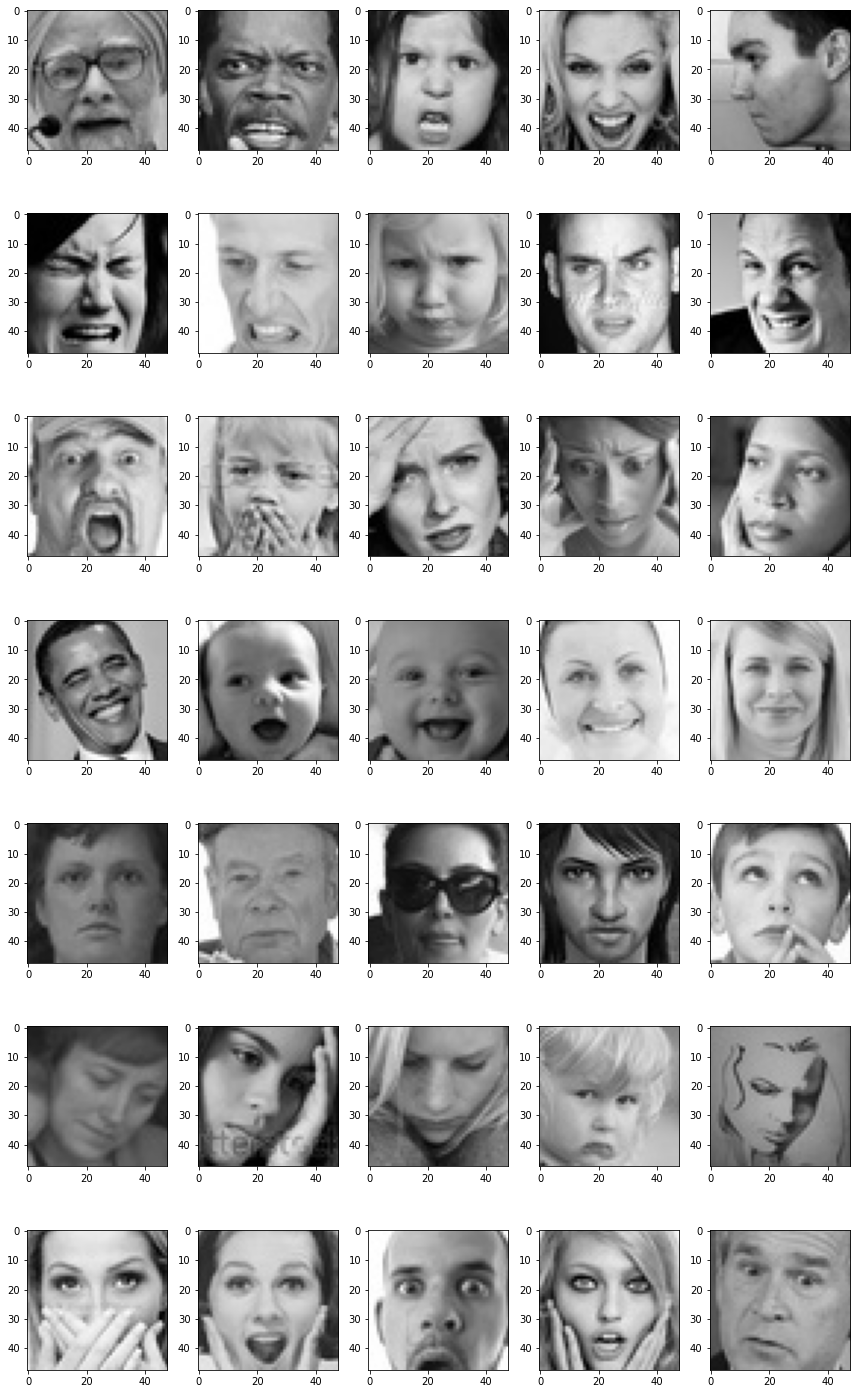

In [10]:
img_size = (im.shape[0], im.shape[1])
plt.figure(figsize=(12,20))
ctr = 0
folder = 'C:/Users/lucky/Documents/GitHub/FacialExpressionRecognition/images/train/'

for expression in os.listdir(folder):
    for i in range(1,6):
        ctr += 1
        plt.subplot(7,5,ctr)
        img = load_img(folder + expression + '/' + os.listdir(folder + expression)[i], target_size = img_size)
        plt.imshow(img, cmap='gray')
        
plt.tight_layout()

In [12]:
for expr in os.listdir(folder):
    print('The training folders have ' + str(len(os.listdir(folder + expr))) + ' ' + expr + ' images')

The training folders have 3993 angry images
The training folders have 436 disgust images
The training folders have 4103 fear images
The training folders have 7164 happy images
The training folders have 4982 neutral images
The training folders have 4938 sad images
The training folders have 3205 surprise images


# Generating Training and Validation batches

In [15]:
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory('C:/Users/lucky/Documents/GitHub/FacialExpressionRecognition/images/train/',
                                                   target_size = img_size,
                                                   batch_size=batch_size,
                                                   color_mode = 'grayscale',
                                                   class_mode = 'categorical',
                                                   shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory('C:/Users/lucky/Documents/GitHub/FacialExpressionRecognition/images/validation/',
                                                   target_size = img_size,
                                                   batch_size=batch_size,
                                                   color_mode = 'grayscale',
                                                   class_mode = 'categorical',
                                                   shuffle = False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# CNN Model Creation

In [19]:
model = Sequential()

# Conv Layer 1
model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Layer 2
model.add(Conv2D(128, (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Layer 3
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Layer 4
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flattening the model and pass it on to Fully Connected Dense layer
model.add(Flatten())

# First FC layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Second FC layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Final Output Layer
model.add(Dense(7, activation='softmax'))

# Optimization and Compile
model.compile(optimizer=Adam(lr=0.0005),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
             )

# Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 128)      

C:\Users\lucky\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1179904   
                                                                 
 batch_normalization_15 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 256)               0         
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_16 (Bat  (None, 128)              512       
 chNormali

# Training and Evaluating Model

In [20]:
epochs = 15
train_per_epoch = train_generator.n//train_generator.batch_size
val_per_epoch = validation_generator.n//validation_generator.batch_size

In [22]:
print(epochs)
print(train_per_epoch)
print(val_per_epoch)
print(train_generator.n)
print(train_generator.batch_size)
print(validation_generator.n)
print(validation_generator.batch_size)

15
450
110
28821
64
7066
64


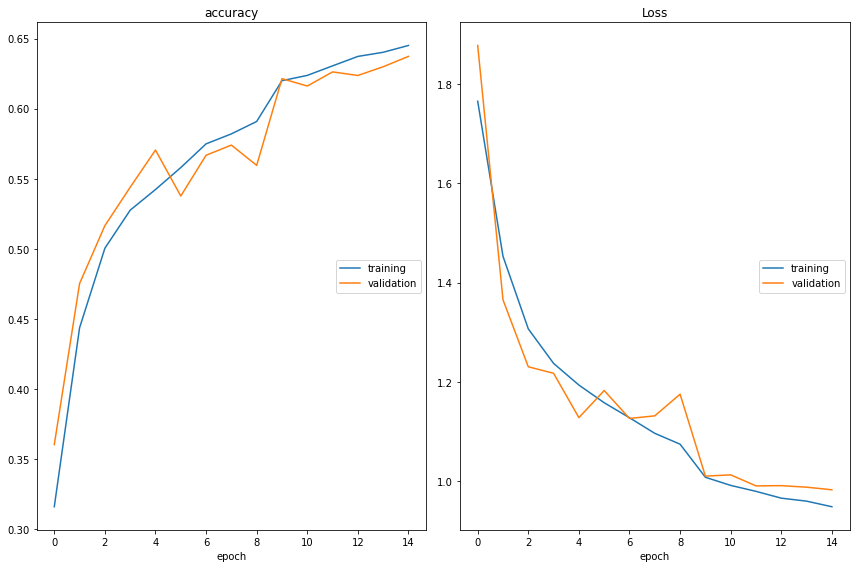

accuracy
	training         	 (min:    0.316, max:    0.645, cur:    0.645)
	validation       	 (min:    0.360, max:    0.637, cur:    0.637)
Loss
	training         	 (min:    0.948, max:    1.765, cur:    0.948)
	validation       	 (min:    0.982, max:    1.878, cur:    0.982)

Epoch 15: saving model to C:/Users/lucky/Documents/GitHub/FacialExpressionRecognition\model_weights.h5
450/450 [==============================] - 317s 704ms/step - loss: 0.9481 - accuracy: 0.6452 - val_loss: 0.9823 - val_accuracy: 0.6374 - lr: 5.0000e-05


In [23]:
# Creating callbacks

checkpoint = ModelCheckpoint('C:/Users/lucky/Documents/GitHub/FacialExpressionRecognition/model_weights.h5',
                             monitor = 'val_accuracy',
                             save_weights_only=True,
                             mode = 'max',
                             verbose=1
                            )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.1,
                             patience=2,
                             min_lr=0.00001,
                             mode='auto')

callbacks = [PlotLossesKeras(), checkpoint, reduce_lr]

# History

history = model.fit(
    x = train_generator,
    steps_per_epoch=train_per_epoch,
    epochs = epochs,
    validation_data=validation_generator,
    validation_steps=val_per_epoch,
    callbacks = callbacks
)

# Representing the Model as json string

In [24]:
model_json = model.to_json()
with open('C:/Users/lucky/Documents/GitHub/FacialExpressionRecognition/model.json', 'w') as json_files:
    json_files.write(model_json)